<a href="https://colab.research.google.com/github/aimbsg/EIP4-GB/blob/master/1st_DNN_GB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


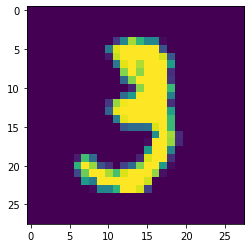

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[10])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 9))
model.add(Flatten())
model.add(Activation('softmax'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 256)       295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 18, 512)       1180160   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 512)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 10)         

In [13]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [14]:
model.fit(X_train, Y_train, batch_size=8, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.





Epoch 1/10





60000/60000 [==============================] - 207s 3ms/step - loss: 0.1765 - acc: 0.9470
Epoch 2/10
60000/60000 [==============================] - 199s 3ms/step - loss: 0.0721 - acc: 0.9781
Epoch 3/10
60000/60000 [==============================] - 199s 3ms/step - loss: 0.0574 - acc: 0.9828
Epoch 4/10
60000/60000 [==============================] - 199s 3ms/step - loss: 0.0474 - acc: 0.9857
Epoch 5/10
60000/60000 [==============================] - 199s 3ms/step - loss: 0.0402 - acc: 0.9873
Epoch 6/10
60000/60000 [==============================] - 199s 3ms/step - loss: 0.0376 - acc: 0.9886
Epoch 7/10
60000/60000 [==============================] - 198s 3ms/step - loss: 0.0342 - acc: 0.9895
Epoch 8/10
60000/60000 [==============================] - 199s 3ms/step - loss: 0.0307 - acc: 0.9901
Epoch 9/10
60000/60000 [==============================] - 199s 3ms/step - loss: 0.0296 - acc: 0.9909
Epoch 10/10
60000/60000 [==============================] - 199s 3ms/step - loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [16]:
print('Test Accuracy : ')
print(round(score[1],2))

Test Accuracy : 
0.99


In [0]:
y_pred = model.predict(X_test)

In [18]:
print(y_pred[:9])
print(y_test[:9])

[[4.1683064e-14 2.8148870e-14 6.1575069e-09 2.6336737e-08 3.1498190e-18
  1.4508360e-13 1.2600102e-25 1.0000000e+00 3.8727966e-12 5.4467364e-08]
 [8.6060700e-11 1.6441483e-12 1.0000000e+00 7.9280214e-16 4.0347651e-13
  2.7032924e-19 3.8187911e-14 4.4807791e-13 9.6494688e-15 6.3334314e-19]
 [2.7974614e-11 9.9999523e-01 2.0873829e-08 7.9192164e-09 3.9093070e-06
  3.7511207e-08 3.3736894e-10 8.6492929e-07 2.9947010e-08 3.8953867e-09]
 [9.9969065e-01 8.8289717e-16 4.6071216e-10 1.0942378e-09 3.3751393e-10
  1.3603960e-06 2.9354979e-04 6.4456160e-09 1.2571921e-05 1.8987532e-06]
 [5.2122541e-15 6.4919632e-12 2.7823874e-12 3.0563602e-13 1.0000000e+00
  2.4433389e-12 5.0745737e-08 2.0224844e-11 4.0888286e-11 5.9518303e-08]
 [4.3280164e-11 9.9998510e-01 1.8961291e-08 1.9339683e-09 1.0066891e-05
  2.4975896e-10 4.6431270e-10 4.8700922e-06 2.9224939e-08 5.8202798e-09]
 [3.7692069e-18 2.9840869e-08 8.4195767e-12 5.1297361e-10 1.0000000e+00
  2.6568340e-14 4.7130840e-15 1.1600038e-13 6.6103385e-09 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()